## Support Vector Machines (SVMs)

*Support Vector Machines* (SVMs) betrachten die Klassifikation als Optimierungsproblem und definieren hierdurch eine Strategie, die Decision Boundary auszuwählen. Wir betrachten hier nur die Grundidee von SVMs und nicht die vollständige mathematische Beschreibung. Die Idee von SVMs können wir uns gut mithilfe von Decision Boundaries veranschaulichen.

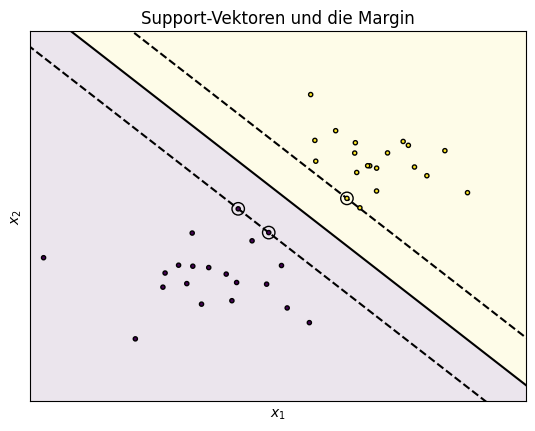

In [1]:
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt

# we create 40 separable points
np.random.seed(0)
X_linear = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]]
Y_linear = [0] * 20 + [1] * 20

# then we fit the SVM
clf = SVC(kernel='linear')
clf.fit(X_linear, Y_linear)

#  now we get the separating hyperplane
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (clf.intercept_[0]) / w[1]

# plot the parallels to the separating hyperplane that pass through the
# support vectors (margin away from hyperplane in direction
# perpendicular to hyperplane). This is sqrt(1+a^2) away vertically in
# 2-d.
margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin

# plot the line, the points, and the nearest vectors to the plane
plt.figure()
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
            facecolors='none', zorder=10, edgecolors='k')
plt.scatter(X_linear[:, 0], X_linear[:, 1], c=Y_linear, zorder=10,
            edgecolors='k',  marker='.')

# now we plot the decision surface
x_min = -4.8
x_max = 4.2
y_min = -6
y_max = 6
XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
Z = clf.predict(np.c_[XX.ravel(), YY.ravel()])
Z = Z.reshape(XX.shape)
plt.pcolormesh(XX, YY, Z, alpha=0.1, shading='auto')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.title('Support-Vektoren und die Margin')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

plt.show()

Wir sehen zwei Gruppen von Instanzen, eine in der gelben und eine in der lila Gegend. Diese Daten kann man sehr einfach durch eine Gerade trennen. Wir haben sogar gleich drei solche Geraden eingezeichnet und es gibt noch viele weitere, zum Beispiel mit einer anderen Steigung. Alle diese Geraden liefern für die gegebenen Daten die gleiche Klassifikation. Die drei Geraden sind jedoch nicht beliebig gewählt, sondern so, dass sie die *Margin* bzw. die Lücke zwischen den Daten maximieren. Die gestrichelten Geraden haben den höchstmöglichen Abstand voneinander, sodass noch alle Datenpunkte korrekt klassifiziert werden. Die durchgezogene Gerade liegt genau in der Mitte der gestrichelten Geraden. Das heißt, dass sie den Abstand zu den Daten maximiert. Dadurch dass die Gerade genau in der Mitte liegt, gilt auch, dass die umkringelten Instanzen die gleiche Entfernung von der durchgezogenen Geraden haben. Der Abstand ist also zu beiden Klassen gleich groß. Man spricht hierbei von der *Maximierung der Margin*.

Die Maximierung der Margin ist genau das Optimierungsziel der SVMs: Eine Gerade (bzw. Hyperebene) zu bestimmen, die so weit wie möglich von allen Datenpunkten entfernt ist und die Klassen trennt. Den Grund für dieses Optimierungsziel kann man sich so erklären:

- Unsere Trainingsdaten sind nur eine Stichprobe, es gibt also noch weitere Instanzen. 
- Wenn es noch weitere Instanzen gibt, ist es naheliegend, dass es auch weitere Instanzen in den Grenzbereichen der Verteilungen der Klassen gibt.
- Wenn es weitere Instanzen in den Grenzbereichen gibt, wird es auch Instanzen geben, die im Bereich zwischen den gestrichelten Geraden liegen, wobei diese Instanzen vermutlich nah an den Geraden liegen würden.
- Wenn wir die gestrichelten Geraden zur Klassifikation verwenden würden, gäbe es Fehlklassifikationen.
- Wenn wir die durchgezogene Gerade zur Klassifikation nehmen, maximieren wir die Margin und minimieren dadurch die Wahrscheinlichkeit, dass neue Instanzen im Grenzbereich falsch klassifiziert werden.

Ihren Namen haben die SVMs von den *Support-Vektoren*. Dies sind die umkringelten Instanzen auf den gestrichelten Geraden. Da diese Punkte den minimalen Abstand zwischen den Klassen repräsentieren, sind sie für die Definition der Margin verantwortlich. Würde man nur mit den Support-Vektoren trainieren, bekäme man trotzdem das gleiche Ergebnis, da es keine bessere Trennung zwischen diesen Datenpunkten gibt. Im Beispiel würden also die drei umkringelten Datenpunkte theoretisch für das Training ausreichend sein. Dennoch ist es natürlich besser, mehr Daten zu haben, da man dadurch die korrekte Lage der Grenze zwischen den Klassen besser schätzen kann.

SVMs wären jedoch nicht so erfolgreich, wenn man nur eine lineare Trennung der Daten trainieren könnte, wie wir sie im Beispiel sehen. Um eine mächtigere nicht lineare Repräsentation der Decision Boundary[^1] zu ermöglichen, setzen die SVMs auf das Konzept der *Feature Expansion*. Hierbei wird der Merkmalsraum in einen höherdimensionalen Raum transformiert. In dem hochdimensionalen Raum wird dann eine lineare Trennung berechnet. Im ursprünglichen Merkmalsraum sieht diese Trennung dann jedoch nicht mehr linear aus, sondern hängt von der Raumtransformation ab. Dieses recht abstrakte Konzept können wir uns wie folgt veranschaulichen.

[^1]: Ein Decision Boundary (Entscheidungsgrenze) ist in der Machine Learning-Welt eine Grenze, die einen Raum in zwei (oder mehr) Bereiche unterteilt, basierend auf der Vorhersage eines Modells.

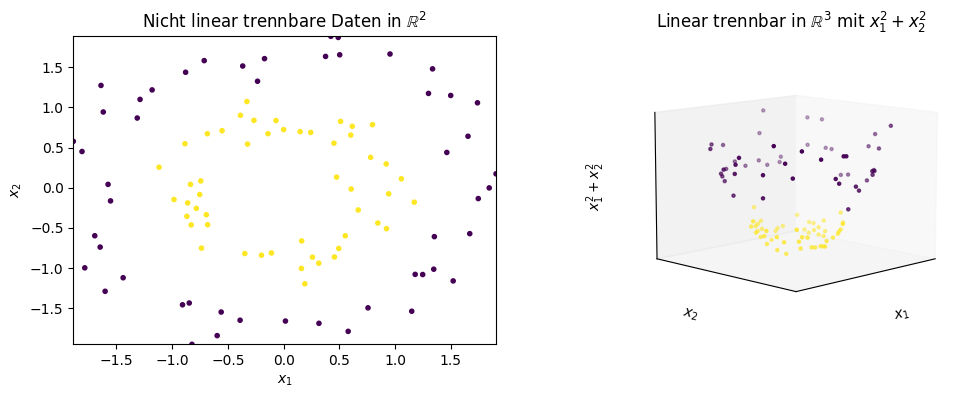

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_circles
from mpl_toolkits.mplot3d import Axes3D


X_circles, Y_circles = make_circles(noise=0.1, factor=0.5, random_state=1)
X_circles = StandardScaler().fit_transform(X_circles)

Z_circles = X_circles[:,0]*X_circles[:,0]+X_circles[:,1]*X_circles[:,1]

fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot(1, 2, 1)
ax.scatter(X_circles[:,0], X_circles[:,1],c=Y_circles, marker='.')
ax.set_xlim(X_circles[:,0].min(), X_circles[:,0].max())
ax.set_ylim(X_circles[:,1].min(), X_circles[:,1].max())
ax.set_title('Nicht linear trennbare Daten in $\\mathbb{R}^2$')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.zaxis.set_rotate_label(False)
ax.scatter(X_circles[:,0], X_circles[:,1], Z_circles, c=Y_circles, marker='.')
ax.set_title('Linear trennbar in $\\mathbb{R}^3$ mit $x_1^2+x_2^2$')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$x_1^2+x_2^2$', rotation=90)
ax.set_xticks(())
ax.set_yticks(())
ax.set_zticks(())
ax.view_init(10, 45)
plt.show()

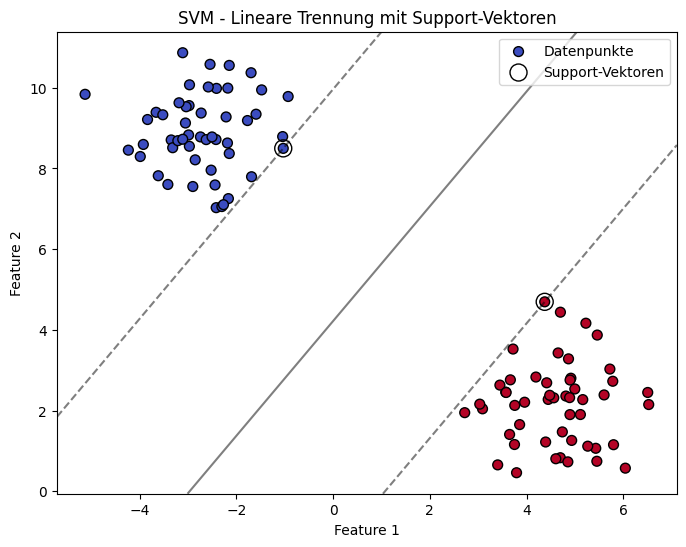

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_blobs

# Generiere lineare Daten
X, y = make_blobs(n_samples=100, centers=2, cluster_std=1.0, random_state=42)

# SVM-Modell mit linearem Kernel
model = SVC(kernel="linear", C=1)
model.fit(X, y)

# Erhalte Support-Vektoren
support_vectors = model.support_vectors_

# Plot der Datenpunkte
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=50, edgecolors='k', label="Datenpunkte")
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=150, facecolors='none', edgecolors='k', label="Support-Vektoren")

# Entscheidungsgrenze und Margins
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Gitter erstellen
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)

# Zeichne Entscheidungsgrenze und Margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

# Labels und Legende
plt.title("SVM - Lineare Trennung mit Support-Vektoren")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

Auf der linken Seite sehen wir zwei ineinander liegende Kreise, die unterschiedlich klassifiziert sind. Offensichtlich gibt es keine Gerade, mit der man diese Instanzen trennen kann, und man kann diese Daten folglich auch nicht mit einer linearen SVM sinnvoll klassifizieren. Auf der rechten Seite sehen wir die Erweiterung des Merkmalsraums durch das Merkmal $(x_1^2+x_2^2)$. Durch diese dritte Dimension erkennen wir, dass die gelben Instanzen im unteren Bereich liegen und die lila Instanzen im oberen Bereich. Mit einer Ebene, also der dreidimensionalen Erweiterung einer Geraden, können wir die Daten jetzt linear trennen. In den ursprünglichen zwei Dimensionen würde diese Trennung aber zu einer kreisförmigen Decision Boundary führen. Dies ist genau wie bei einer Tasse: Von oben betrachtet ist die Form auch nur ein Kreis.

In der Praxis definiert man bei SVMs nicht händisch weitere Merkmale, um den Raum zu erweitern, sondern benutzt stattdessen *Kernfunktionen* (engl. *kernel functions*). Die Kernfunktionen definieren, wie die Merkmale in den höherdimensionalen Raum transformiert werden. Das obige Beispiel benutzt einen *polynmiellen* Kern, da wir die Merkmale durch eine quadratische Funktion transformieren. Während wir uns das noch relativ einfach visualisieren können, ist das nicht bei allen Kernfunktionen ohne Weiteres möglich. Die *radiale Basisfunktion* (RBF) misst zum Beispiel die paarweisen radialen Distanzen zwischen den Instanzen und führt zu einem unendlichdimensionalen Merkmalsraum. Dies kann man weder visualisieren noch einfach berechnen. Im Allgemeinen kann man also die Kerntransformation nicht visuell darstellen und zum Teil nicht einmal den Raum vollständig berechnen. Die SVMs nutzen den *Kernel-Trick* (den wir hier nicht im Detail diskutieren), um zu vermeiden, dass die Daten überhaupt transformiert werden müssen.

> **Bemerkung:**
>
> Die Kernfunktionen der SVMs haben häufig noch Parameter, mit denen diese skaliert werden. Für den praktischen Einsatz von SVMs sind die Parameter extrem wichtig und sie haben einen großen Einfluss auf das Ergebnis der Klassifikation. SVMs können sehr mächtig sein, jedoch nur wenn eine geeignete Kernfunktion mit passenden Parametern gewählt wird. 
